In [3]:
%pip install pandas seaborn matplotlib -q
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
# Read dataset into dataframe
df = pd.read_csv('../data/jobs_in_data_science.csv')
df.columns = df.columns.str.strip()  # Get rid of trailing spaces in column names
df

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M
...,...,...,...,...,...,...,...,...,...,...,...,...
9350,2021,Data Specialist,Data Management and Strategy,USD,165000,165000,United States,Senior,Full-time,Remote,United States,L
9351,2020,Data Scientist,Data Science and Research,USD,412000,412000,United States,Senior,Full-time,Remote,United States,L
9352,2021,Principal Data Scientist,Data Science and Research,USD,151000,151000,United States,Mid-level,Full-time,Remote,United States,L
9353,2020,Data Scientist,Data Science and Research,USD,105000,105000,United States,Entry-level,Full-time,Remote,United States,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB


In [6]:
df.describe()

,work_year,salary,salary_in_usd
count,9355.000000,9355.000000,9355.000000
mean,2022.760449,149927.981293,150299.495564
std,0.519470,63608.835387,63177.372024
min,2020.000000,14000.000000,15000.000000
25%,2023.000000,105200.000000,105700.000000
50%,2023.000000,143860.000000,143000.000000
75%,2023.000000,187000.000000,186723.000000
max,2023.000000,450000.000000,450000.000000


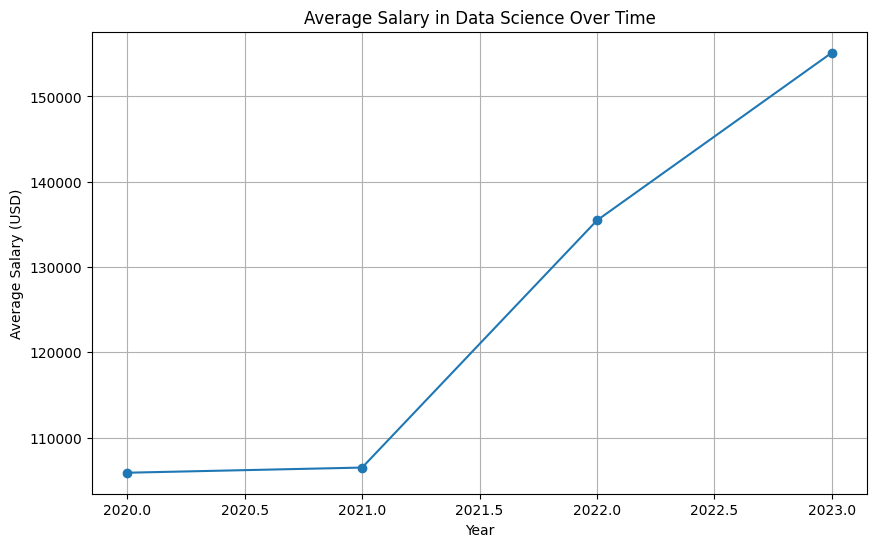

In [7]:
avg_salary_by_year = df.groupby('work_year')['salary_in_usd'].mean()
plt.figure(figsize=(10,6)) # 10in x 6in
avg_salary_by_year.plot(kind='line', marker='o')
plt.title('Average Salary in Data Science Over Time')
plt.xlabel('Year')
plt.ylabel('Average Salary (USD)')
plt.grid(True)
plt.show()

The average salary in data science has shown an upward trend over the years, indicating a growing value in the field.

## Task 2: Salary Distribution by Job Title

<Figure size 1200x800 with 0 Axes>

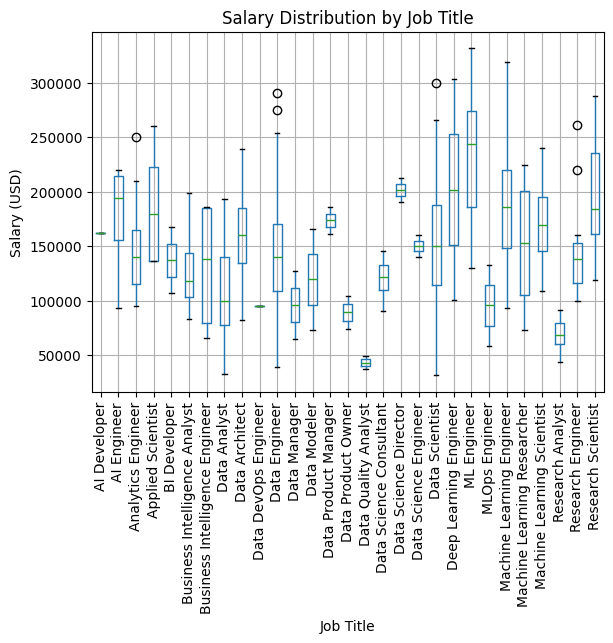

In [8]:
plt.figure(figsize=(12, 8))
df.head(500).boxplot(column='salary_in_usd', by='job_title')
plt.suptitle('')
plt.title('Salary Distribution by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Salary (USD)')
plt.xticks(rotation=90)
plt.show()

## Task 3: Experience Level vs. Salary

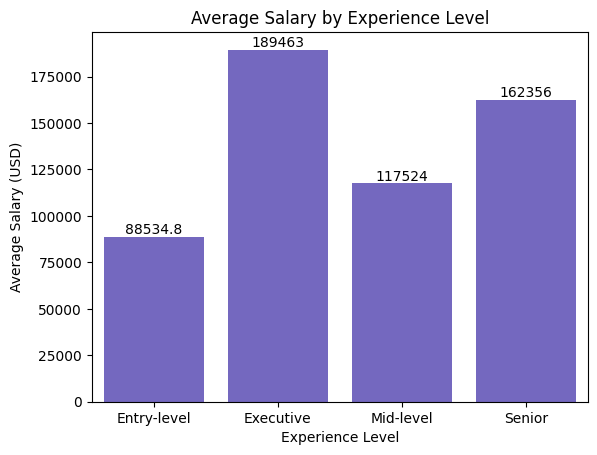

In [9]:
salary_by_exp = df.groupby('experience_level')['salary_in_usd'].mean()
# salary_by_exp.plot(kind='bar')
ax = sns.barplot(x=salary_by_exp.index, y=salary_by_exp.values, color='slateblue')
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Average Salary by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary (USD)')
plt.show()

# Task 4: Geographic Salary Distribution

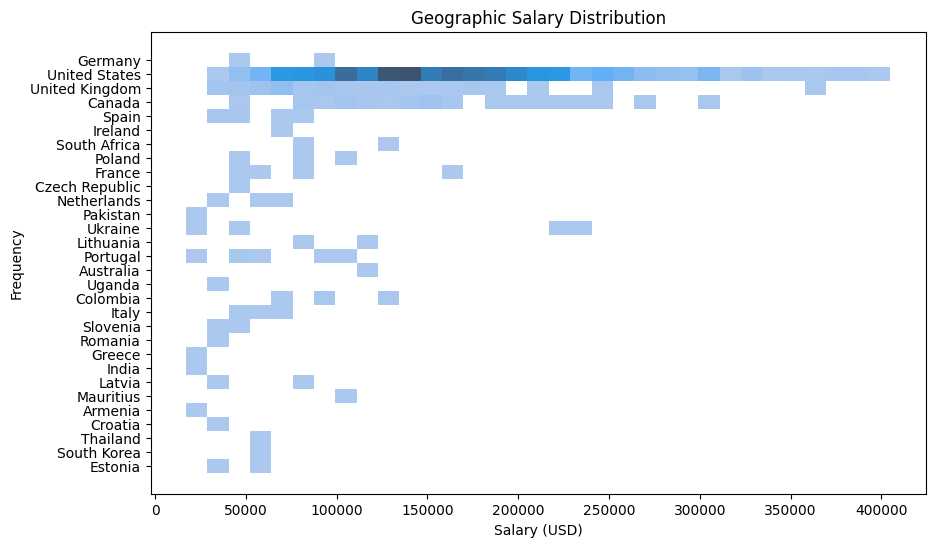

In [10]:
plt.figure(figsize=(10,6))
sns.histplot(y='employee_residence', x='salary_in_usd', data=df.head(2500))
plt.title('Geographic Salary Distribution')
plt.xlabel('Salary (USD)')
plt.ylabel('Frequency')
plt.show()

# Task 5: Company Size and Salary Structure

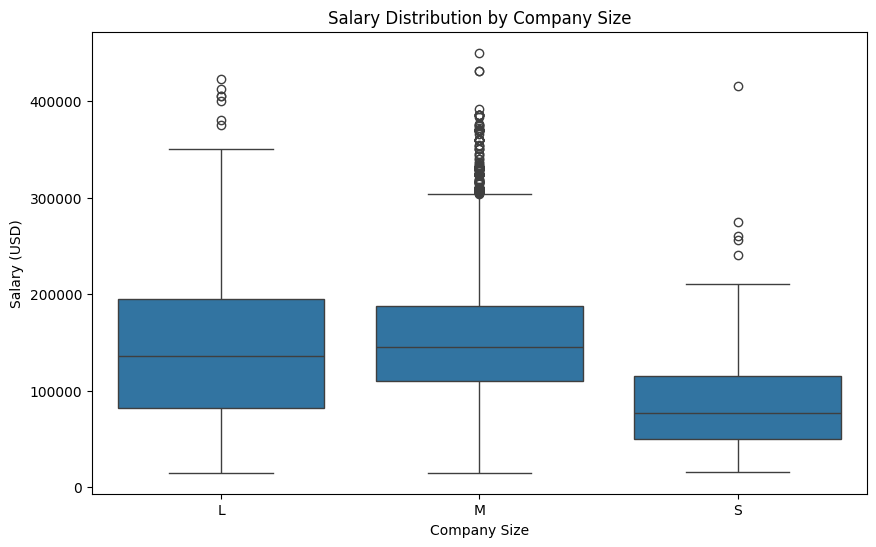

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='company_size', y='salary_in_usd', data=df)  # sns.violinplot(...)
plt.title('Salary Distribution by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Salary (USD)')
plt.show()

# Task 6: Impact of Work Setting on Salary

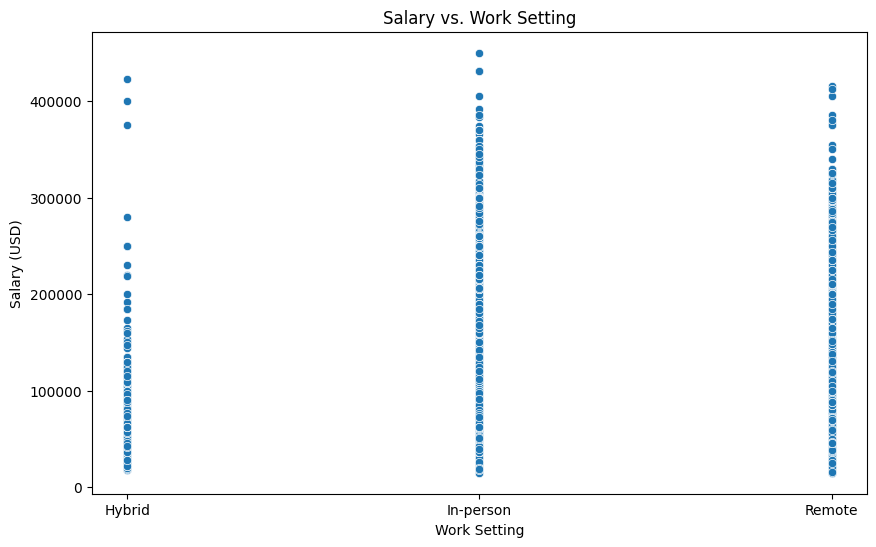

In [12]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='work_setting', y='salary_in_usd', data=df)  # Or sns.boxplot(...)
plt.title('Salary vs. Work Setting')
plt.xlabel('Work Setting')
plt.ylabel('Salary (USD)')
plt.show()